In [1]:
import os, sys
import cv2
import matplotlib.pyplot as plt

from IPython.display import clear_output
import time

from pipeline import Pipeline
from visualize.visualize import View
from visualDet3D.yolo3d_node import Yolo3DNode
from trajectory.trajectory import Trajectory
from visualize.visualize import View
import config.pipeline_config as configData

detector = Yolo3DNode()
#create instance of Trajectory
mot_tracker = Trajectory() 
pipeline = Pipeline()
view = View()

Starting Yolo3DNode.
Reading params.
Loading model.
Done loading model.
--------------------- trajectory ---------------------
self.max_age =  1 
 self.min_hits =  3 
 self.iou_threshold =  0.3 
 self.no_of_future_frames =  5 
 self.no_of_past_frames =  5 

Starting Pipeline.
Reading Pipeline params.
Loading Pipeline.
Starting Yolo3DNode.
Reading params.
Loading model.
Done loading model.
--------------------- trajectory ---------------------
self.max_age =  1 
 self.min_hits =  3 
 self.iou_threshold =  0.3 
 self.no_of_future_frames =  5 
 self.no_of_past_frames =  5 

Starting View.
Reading View params.
Starting View.
Reading View params.


In [2]:
pwd

'/home/chirathv97/FYP/Stereo-Vision-Based-Vehicle-Forward-Collision-Warning-System'

19


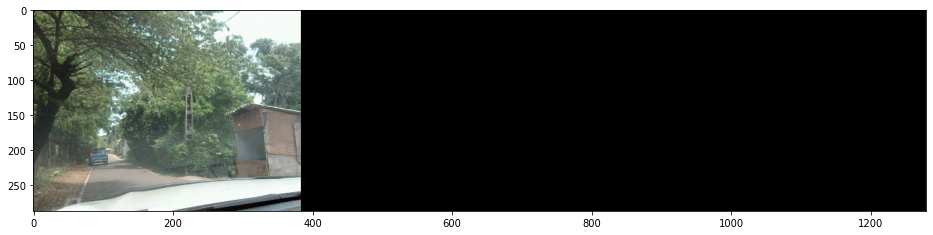

In [3]:
l=10
for i in range (l,l+10):
    left_image = cv2.imread("./data/local_s1_left/%06d" % i+".png")
    right_image = cv2.imread("./data/local_s1_right/%06d" % i+".png")
    
    rgb_image, scores, bbox_2d, obj_names, bbox_3d_corner_homo = detector.predict(left_image, right_image)
    
    fig = plt.figure(figsize=(16,9))
    for box in bbox_3d_corner_homo:
        box = box.cpu().numpy().T
        rgb_image = draw_3D_box(rgb_image, box)
    rgb_image=cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    clear_output(wait=True) #to show in same window 
    plt.imshow(rgb_image)
    print(i)
    plt.show()

In [17]:
# Camera parameters to undistort and rectify images
cv_file = cv2.FileStorage()
cv_file.open('cameraCalibration/stereoMapNew.xml', cv2.FileStorage_READ)

stereoMapL_x = cv_file.getNode('stereoMapL_x').mat()
stereoMapL_y = cv_file.getNode('stereoMapL_y').mat()
stereoMapR_x = cv_file.getNode('stereoMapR_x').mat()
stereoMapR_y = cv_file.getNode('stereoMapR_y').mat()

print(stereoMapL_x)

[[[  1   1]
  [  2   1]
  [  2   0]
  ...
  [310  -4]
  [311  -4]
  [311  -4]]

 [[  1   2]
  [  1   1]
  [  2   1]
  ...
  [310  -3]
  [311  -3]
  [312  -3]]

 [[  0   2]
  [  1   2]
  [  2   2]
  ...
  [310  -2]
  [311  -2]
  [312  -2]]

 ...

 [[ -5 230]
  [ -4 230]
  [ -3 231]
  ...
  [311 234]
  [312 234]
  [313 234]]

 [[ -5 231]
  [ -4 231]
  [ -3 232]
  ...
  [311 235]
  [312 235]
  [313 235]]

 [[ -5 232]
  [ -4 232]
  [ -3 232]
  ...
  [311 236]
  [312 236]
  [313 236]]]


9


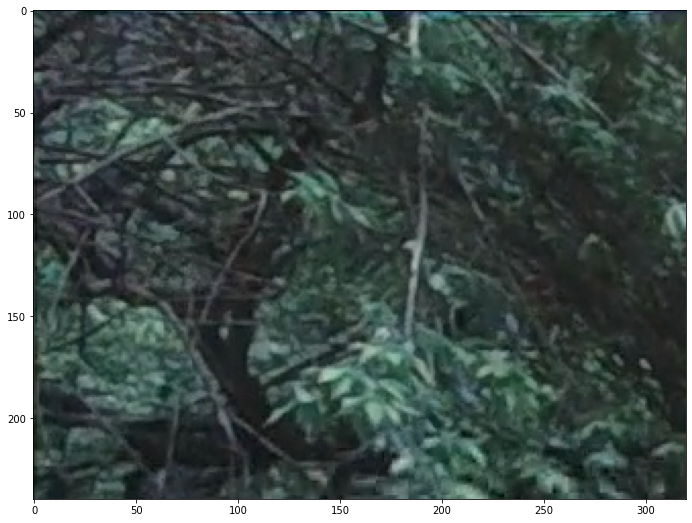

In [18]:
l=10
for i in range (l):
    frame_left = cv2.imread("./data/local_s1_left/%06d" % i+".png")
    frame_right = cv2.imread("./data/local_s1_right/%06d" % i+".png")
    
    # resize image
    r_frame_left = frame_left #cv2.resize(frame_left, dim, interpolation = cv2.INTER_AREA)
    r_frame_right = frame_right #cv2.resize(frame_right, dim, interpolation = cv2.INTER_AREA)
    

    # Undistort and rectify images
    frame_right = cv2.remap(r_frame_right, stereoMapR_x, stereoMapR_y, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    frame_left = cv2.remap(r_frame_left, stereoMapL_x, stereoMapL_y, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
                     
    # Show the frames
    #cv2.imshow("frame right", frame_right) 
    #cv2.imshow("frame left", frame_left)
    fig = plt.figure(figsize=(16,9))
    clear_output(wait=True) #to show in same window 
    plt.imshow(frame_right)
    print(i)
    plt.show()

    # Hit "q" to close the window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(dim)
        break

In [13]:
cv2.destroyAllWindows()

In [ ]:
# Camera parameters to undistort and rectify images
cv_file = cv2.FileStorage()
cv_file.open('stereoMapNew.xml', cv2.FileStorage_READ)

stereoMapL_x = cv_file.getNode('stereoMapL_x').mat()
stereoMapL_y = cv_file.getNode('stereoMapL_y').mat()
stereoMapR_x = cv_file.getNode('stereoMapR_x').mat()
stereoMapR_y = cv_file.getNode('stereoMapR_y').mat()


# Open both cameras
cap = cv2.VideoCapture(2)                    
# cap_left =  cv2.VideoCapture(0, cv2.CAP_DSHOW)


while(cap.isOpened()):

    succes, frame = cap.read()
    
    h, w, channels = frame.shape # (240, 640, 3)
    half = w//2
    
    scale_percent = 400 # percent of original size
    width = int(half * scale_percent / 100)
    height = int(h * scale_percent / 100)
    dim = (width, height)
    
    frame_left = frame[:, :half]
    frame_right = frame[:, half:]    
    
    # resize image
    r_frame_left = cv2.resize(frame_left, dim, interpolation = cv2.INTER_AREA)
    r_frame_right = cv2.resize(frame_right, dim, interpolation = cv2.INTER_AREA)
    
    

    # Undistort and rectify images
    frame_right = cv2.remap(r_frame_right, stereoMapR_x, stereoMapR_y, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    frame_left = cv2.remap(r_frame_left, stereoMapL_x, stereoMapL_y, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
                     
    # Show the frames
    cv2.imshow("frame right", frame_right) 
    cv2.imshow("frame left", frame_left)


    # Hit "q" to close the window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(dim)
        break


In [6]:
# Release and destroy all windows before termination
cap.release()


cv2.destroyAllWindows()

NameError: name 'cap' is not defined